In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hiNv1Tvp_RnKK-UBpa1yd4rai337Fs-4' -O '5-global.csv'

--2020-04-25 06:58:17--  https://docs.google.com/uc?export=download&id=1hiNv1Tvp_RnKK-UBpa1yd4rai337Fs-4
Resolving docs.google.com (docs.google.com)... 172.217.15.78, 2607:f8b0:4004:804::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m6g5vag81evpofhjq4ef22094o535871/1587797850000/11679187678651940095/*/1hiNv1Tvp_RnKK-UBpa1yd4rai337Fs-4?e=download [following]
--2020-04-25 06:58:17--  https://doc-00-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m6g5vag81evpofhjq4ef22094o535871/1587797850000/11679187678651940095/*/1hiNv1Tvp_RnKK-UBpa1yd4rai337Fs-4?e=download
Resolving doc-00-30-docs.googleusercontent.com (doc-00-30-docs.googleusercontent.com)... 172.217.5.225, 2607:f8b0:4004:804::2001
Connecting to doc-00-30-docs.googleusercontent.com (doc-00-30-docs.googleus

In [0]:
df = pd.read_csv('./5-global.csv')

In [4]:
df.head()

,MAP_ID,IN_JAN,IN_FEB,IN_MAR,IN_APR,IN_MAY,IN_JUN,IN_JUL,IN_AUG,IN_SEP,IN_OCT,IN_NOV,IN_DEC,DESC_ALERT,DESC_FIRE,DESC_OTHER,DESC_NEW,NB_UNITS,Median_NrIncidentsLastWeek,Median_NrIncidentsLastMonth,Median_NrCrimesLastWeek,Median_NrCrimesLastMonth,NB_PROPERTIES,FLOORS,HOUSINGS,YEAR_CONSTRUCTION,LAND_AREA,BUILDING_AREA,USAGE_LOGEMENT,CATEGORY_REGULAR,CATEGORY_CONDOMINIUM,RISK_ZONE_ID
0,1-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,16,2.0,1.0,1956.0,445.0,230.0,0.813,0.813,0.188,1
1,1-11,0.0,0.0,0.1,0.0,0.1,0.3,0.3,0.0,0.1,0.0,0.0,0.1,0.9,0.1,0.0,0.0,4.0,0.0,0.0,0.0,0.0,18,2.0,1.0,1932.5,387.5,268.0,0.833,0.667,0.333,2
2,10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,2.0,1.0,1973.0,1413.0,188.0,1.000,1.000,0.000,1
3,10-15,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,2,1.0,1.0,1981.5,11562.5,143.5,0.500,1.000,0.000,1
4,10-16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,2,1.0,1.0,1975.5,63457.0,5989.5,0.000,1.000,0.000,1


In [5]:
df.shape[1]

32

In [6]:
df.shape[0]

3200

In [7]:
df['RISK_ZONE_ID'].value_counts()

1    1169
3     828
2     658
4     495
5      50
Name: RISK_ZONE_ID, dtype: int64

In [8]:
num_classes = df['RISK_ZONE_ID'].nunique()
num_classes

5

In [0]:
X = df.drop(['MAP_ID', 'RISK_ZONE_ID'], axis=1).values

In [0]:
y = df.loc[:,'RISK_ZONE_ID'].values

In [0]:
y_norm = y-1

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import scale
X = scale(X)

In [13]:
X.shape

(3200, 30)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y_norm,random_state=0)

In [15]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 30), (2400, 30), (800, 30), (2400,), (800,))

In [16]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [17]:
X.shape, X_train.shape, X_test.shape, y_train_cat.shape, y_test_cat.shape

((3200, 30), (2400, 30), (800, 30), (2400, 5), (800, 5))

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, Adamax, Nadam, SGD, RMSprop, Adagrad, Adadelta
import time

inputs = Input(shape=(30,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.5)(x)

outputs = Dense(num_classes, activation='softmax')(x)

func_model = Model(inputs, outputs)

func_model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.002),
                    metrics=['accuracy'])

In [31]:
func_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               15872     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 2565      
Total params: 18,437
Trainable params: 18,437
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_test.shape

(800, 30)

In [36]:
early_stopping_monitor = EarlyStopping(patience=3, monitor = 'val_accuracy')

startTime = time.time()

training = func_model.fit(X_train, y_train_cat, batch_size=32,
          epochs=50, verbose=1, validation_split=0.2, callbacks = [early_stopping_monitor])

endTime = time.time()

history = training.history

print ('\nTraining time: %0.2f seconds' % (endTime - startTime))

Train on 1920 samples, validate on 480 samples
Epoch 1/50
1920/1920 [==============================] - 0s 95us/step - loss: 0.4364 - accuracy: 0.8151 - val_loss: 0.8185 - val_accuracy: 0.7396
Epoch 2/50
1920/1920 [==============================] - 0s 94us/step - loss: 0.4123 - accuracy: 0.8302 - val_loss: 0.7226 - val_accuracy: 0.7458
Epoch 3/50
1920/1920 [==============================] - 0s 91us/step - loss: 0.4066 - accuracy: 0.8313 - val_loss: 0.7614 - val_accuracy: 0.7458
Epoch 4/50
1920/1920 [==============================] - 0s 89us/step - loss: 0.3984 - accuracy: 0.8365 - val_loss: 0.7727 - val_accuracy: 0.7625
Epoch 5/50
1920/1920 [==============================] - 0s 89us/step - loss: 0.3812 - accuracy: 0.8401 - val_loss: 0.7267 - val_accuracy: 0.7500
Epoch 6/50
1920/1920 [==============================] - 0s 88us/step - loss: 0.3829 - accuracy: 0.8391 - val_loss: 0.7392 - val_accuracy: 0.7458
Epoch 7/50
1920/1920 [==============================] - 0s 101us/step - loss: 0.387

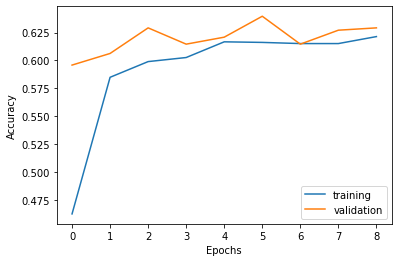

In [22]:
plt.figure(figsize=(6,4))

plt.plot(history['accuracy'], label = 'training')
# Plot the validation accuracy
plt.plot(history['val_accuracy'], label = 'validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Show the figure
plt.legend()
plt.show()

In [23]:
score = func_model.evaluate(X_test, y_test_cat,
                       batch_size=64, verbose=1)
print('Test accuracy: %0.5f' % score[1])

800/800 [==============================] - 0s 34us/step
Test accuracy: 0.63250


In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
import numpy as np

y_pred = np.argmax(func_model.predict(X_test), axis=1)

print('Accuracy: %0.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %0.5f' % f1_score(y_test, y_pred, average='micro'))
print('Cohen`s kappa score: %0.5f' % cohen_kappa_score(y_test, y_pred))
print('\nConfusion matrix:')
confusion_matrix(y_test, y_pred)

Accuracy: 0.75625
F1 score: 0.75625
Cohen`s kappa score: 0.66801

Confusion matrix:


array([[246,  38,   4,   0,   0],
       [ 33,  96,  35,   0,   0],
       [  9,  43, 140,  18,   0],
       [  0,   1,  12, 117,   0],
       [  0,   0,   0,   2,   6]])